# COGS 118A - Final Project

# Traffic Sign Recognition: CNN vs RNN

## Group members

- Alexander Huynh
- Yimin Lu
- Jenny Vu
- Dong Pham

# Abstract 
This section should be short and clearly stated. It should be a single paragraph <200 words.  It should summarize: 
- what your goal/problem is
- what the data used represents 
- the solution/what you did
- major results you came up with (mention how results are measured) 

__NB:__ this final project form is much more report-like than the proposal and the checkpoint. Think in terms of writing a paper with bits of code in the middle to make the plots/tables

The goal for this project is to come up with and image classification model for road signs to aid computer vision style of self driving or computer vision aided driving. We will be using a data set from Kaggle that will have road signs from Germany with about 180 class labels that will be used as a training set. The trainng set will have about 100K images and testing will have about 50K images. We will be testing the effectiveness and performance of 3 different sizes of Convolutional Neural Networks (CNNs) with and without Residual Connections. We will implement these models and then will compare them by using cross validation techniques that was taught in class. We want our models to classify different road signs and will select the model with the best accuracy on a testing set. Accuracy testing will be done by comparing the meta data file that was given.

# Background


   Traffic sign classification is an important feature of the self-driving car control pipeline. First the image taken from the camera mounted on the self-driving car requires traffic sign detection, since there may be multiple or no signs within the picture, and state-of-the-art object detection deep neural networks are deployed for this task such as Faster R-CNN, R-FCN, SSD, and YOLO V2.</a>[<sup>[1]</sup>](#arcosnote)

   After object detection has found and cropped out street signs from the original image from the self-driving car's camera, the cropped street sign images now require traffic sign classification to understand whether or not each street sign seen is a stop sign, a yield sign, etc. Which is very important information the self-driving car needs in order to obey traffic rules and keep its passengers safe.</a>[<sup>[2]</sup>](#kakarlanote) The state-of-the-art networks that process this task are Resnet V1 50, Resnet V1 101, Inception V2, Inception Resnet V2, Mobilenet V1, and Darknet-19.</a>[<sup>[1]</sup>](#arcosnote)
   
   The state-of-the art models mostly use Residual Networks (ResNets), which are a type of Convolutional Neural Network (CNN) that has adds \"identity shortcut connections\" in order to overcome the vanishing gradient problem which occurs when a network has too many layers.</a>[<sup>[3]</sup>](#kakarlanote)

# Problem Statement

Clearly describe the problem that you are solving. Avoid ambiguous words. The problem described should be well defined and should have at least one ML-relevant potential solution. Additionally, describe the problem thoroughly such that it is clear that the problem is quantifiable (the problem can be expressed in mathematical or logical terms), measurable (the problem can be measured by some metric and clearly observed), and replicable (the problem can be reproduced and occurs more than once).

Self driving cars are the future of transportation in car centric nations. One of the main problems of self driving cars is dectection and recognition of road signs. There are many shapes and objects that people need to discern when driving and it should not be different for computer vision type of self driving. Computer vision style driving allows self driving cars to know what is around the environment. Roadsigns warns the driver the rules of the road and helps keep the road safe for driving. We see lots of things when we are driving and we need to be able to discern the noise from the road signs. How these road signs are perceived are impacted by things such as the weather(e.g. fog, snow) and the lighting of the area. It is important for an self driving models to discern roadsigns despite the environment so they can follow the rules of the road.

# Data

Detail how/where you obtained the data and cleaned it (if necessary)

If the data cleaning process is very long (e.g., elaborate text processing) consider describing it briefly here in text, and moving the actual clearning process to another notebook in your repo (include a link here!).  The idea behind this approach: this is a report, and if you blow up the flow of the report to include a lot of code it makes it hard to read.

Please give the following infomration for each dataset you are using
- link/reference to obtain it
- description of the size of the dataset (# of variables, # of observations)
- what an observation consists of
- what some critical variables are, how they are represented
- any special handling, transformations, cleaning, etc you have done should be demonstrated here!

The dataset we will be using is “Traffic Signs (GTSRB plus 162 custom classes)” created by Daniil Deltsov from Kaggle.

https://www.kaggle.com/datasets/daniildeltsov/traffic-signs-gtsrb-plus-162-custom-classes

The dataset contains 150k images(observations) separated into 205 classes of traffic signs. This dataset is built on the German Traffic Sign Recognition Benchmark Image Set which originally had 43 classes. The images of each sign are assigned to some folder labeled between 0-204. Each class contains 5-40 original images of the sign and additional generated images. The original images varied in background, lighting, and size of sign. By running 5 different transformations 7 times on each original image, more variety of how these traffic signs are viewed is added to the dataset. There is a test folder consisting of 50k images taken from the training set. The observations are png files of different sizes and must be preprocessed before being able to be fed into the models of CNN.


***Currently we cannot import the whole data set to datahub and the github, so most of the computation and data handeling will be done on local machines***

We will import cells and their output on to this document
The images were looped through and resized to be 32x32. By having the images being 32x32 it allows us to train the model on 100k images without it being computationally expensive. After being resized, an image is then converted into a np.array of the same dimensions and appended to an image array which is named X, our data. For some image, it will have arrays containing the 32x32 image pixels and the 3 RGB values for each pixel.



### Extracting images

The data set is sorted on a local machine that was using a local directory. We will need to have to import the data set into the enviornment to handle it

In [ ]:
images = []
labels = []
for i in range(classes):
    path = os.path.join(current_path, 'Data_images', 'train', str(i))
    img_folder = os.listdir(path)
    for j in img_folder:
       try:
           image = cv.imread(str(path+'/'+j))
           image = cv.resize(image, (32, 32))
           image = np.array(image)
           images.append(image)
           label = np.zeros(classes)
           label[i] = 1.0
           labels.append(label)
       except:
           pass
   

We will have two data arrays that will store the images and the label. This code will run and parse through the files and add values to the corresponding table. 

In [ ]:
images = np.array(images)
images = images / 255
labels = np.array(labels)
X = images.astype(np.float32)
y = labels.astype(np.float32)

These lines of code will convert the arrays into numpy arrays. The images array has every element divided by 255 so they will work eaiser as floats and we can run our computer vision library to check on the images. The labels is used to create array y. y contains the one-hot encoded arrays of labels for the 205 classes of roadsigns.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.5, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) 

(48713, 32, 32, 3) (48713, 32, 32, 3) (48713, 205) (48713, 205)


The X and y are split into training and testing sets with ~48k data image points each.

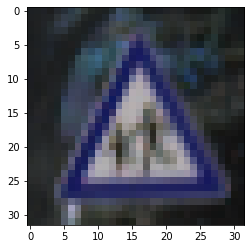

In [ ]:
plt.imshow(X_train[10, :, :, :])

This is just a sample image of one of the data points that will be passed through the nerural networks that we are going to train

# Proposed Solution

In this section, clearly describe a solution to the problem. The solution should be applicable to the project domain and appropriate for the dataset(s) or input(s) given. Provide enough detail (e.g., algorithmic description and/or theoretical properties) to convince us that your solution is applicable. Make sure to describe how the solution will be tested.  

If you know details already, describe how (e.g., library used, function calls) you plan to implement the solution in a way that is reproducible.

If it is appropriate to the problem statement, describe a benchmark model<a name="sota"></a>[<sup>[3]</sup>](#sotanote) against which your solution will be compared. 

For our solution we decided to use 6 total different versions of a CNN model to solve our traffic sign classification problem.

-CNN 5 layer
-CNN 7 layer
-CNN 9 layer

(RNN = CNN with residual connections)

-RNN 5 layer 
-RNN 7 layer
-RNN 9 layer

We will train each of these algorithms multiple times, and compare their performance against each other. It is known that old-school unsupervised methods have been largely outperformed by modern supervised techniques, however modern supervised algorithms require much more computational power in order to work. We will see how many epochs each model takes to converge, and how model size/residual connections affects training time and accuracy.

***Note***: that our benchmark model will be a Convolutional Neural Network LeNet-5 </a>[<sup>[4]</sup>](#lenote) which was composed in the 90s. 

# Evaluation Metrics

Propose at least one evaluation metric that can be used to quantify the performance of both the benchmark model and the solution model. The evaluation metric(s) you propose should be appropriate given the context of the data, the problem statement, and the intended solution. Describe how the evaluation metric(s) are derived and provide an example of their mathematical representations (if applicable). Complex evaluation metrics should be clearly defined and quantifiable (can be expressed in mathematical or logical terms).

# Results

You may have done tons of work on this. Not all of it belongs here. 

Reports should have a __narrative__. Once you've looked through all your results over the quarter, decide on one main point and 2-4 secondary points you want us to understand. Include the detailed code and analysis results of those points only; you should spend more time/code/plots on your main point than the others.

If you went down any blind alleys that you later decided to not pursue, please don't abuse the TAs time by throwing in 81 lines of code and 4 plots related to something you actually abandoned.  Consider deleting things that are not important to your narrative.  If its slightly relevant to the narrative or you just want us to know you tried something, you could keep it in by summarizing the result in this report in a sentence or two, moving the actual analysis to another file in your repo, and providing us a link to that file.

### Subsection 1

You will likely have different subsections as you go through your report. For instance you might start with an analysis of the dataset/problem and from there you might be able to draw out the kinds of algorithms that are / aren't appropriate to tackle the solution.  Or something else completely if this isn't the way your project works.

### Subsection 2

Another likely section is if you are doing any feature selection through cross-validation or hand-design/validation of features/transformations of the data

### Subsection 3

Probably you need to describe the base model and demonstrate its performance.  Maybe you include a learning curve to show whether you have enough data to do train/validate/test split or have to go to k-folds or LOOCV or ???

### Subsection 4

Perhaps some exploration of the model selection (hyper-parameters) or algorithm selection task. Validation curves, plots showing the variability of perfromance across folds of the cross-validation, etc. If you're doing one, the outcome of the null hypothesis test or parsimony principle check to show how you are selecting the best model.

### Subsection 5 

Maybe you do model selection again, but using a different kind of metric than before?



### LeNet-5 Basic

In [ ]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [ ]:
def LeNet(drop_1 = 0.25, drop_2 = 0.25, drop_3 = .5 , k_size1 = (5,5), k_size2 = (3,3)):
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=k_size1, activation='relu', input_shape=X_train.shape[1:])) 
    model.add(Conv2D(filters=32, kernel_size=k_size1, activation='relu')) 
    model.add(MaxPool2D(pool_size=(2,2))) 
    model.add(Dropout(rate=drop_1)) 
    model.add(Conv2D(filters=64, kernel_size=k_size2, activation='relu')) 
    model.add(Conv2D(filters=64, kernel_size=k_size2, activation='relu')) 
    model.add(MaxPool2D(pool_size=(2,2))) 
    model.add(Dropout(rate=drop_2)) 
    model.add(Flatten()) 
    model.add(Dense(256, activation='relu')) 
    model.add(Dropout(rate=drop_3))
    model.add(Dense(classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
    return model

In [ ]:
test = LeNet()
test_plot = test.fit(X_train, y_train, batch_size= 128, epochs= 40, validation_data=(X_test,y_test))

Epoch 1/40
381/381 [==============================] - 4s 9ms/step - loss: 3.3726 - accuracy: 0.2573 - val_loss: 1.3799 - val_accuracy: 0.6247
Epoch 2/40
381/381 [==============================] - 3s 8ms/step - loss: 1.4154 - accuracy: 0.6145 - val_loss: 0.6439 - val_accuracy: 0.8209
Epoch 3/40
381/381 [==============================] - 3s 8ms/step - loss: 0.9315 - accuracy: 0.7353 - val_loss: 0.4429 - val_accuracy: 0.8799
Epoch 4/40
381/381 [==============================] - 3s 8ms/step - loss: 0.7102 - accuracy: 0.7956 - val_loss: 0.3489 - val_accuracy: 0.9084
Epoch 5/40
381/381 [==============================] - 3s 7ms/step - loss: 0.5948 - accuracy: 0.8270 - val_loss: 0.2993 - val_accuracy: 0.9167
Epoch 6/40
381/381 [==============================] - 3s 8ms/step - loss: 0.5084 - accuracy: 0.8487 - val_loss: 0.2571 - val_accuracy: 0.9287
Epoch 7/40
381/381 [==============================] - 3s 8ms/step - loss: 0.4544 - accuracy: 0.8642 - val_loss: 0.2187 - val_accuracy: 0.9416
Epoch 

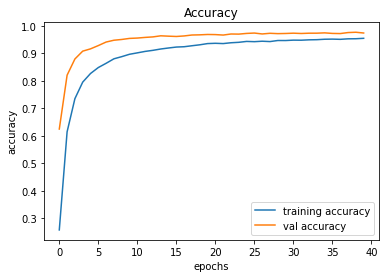

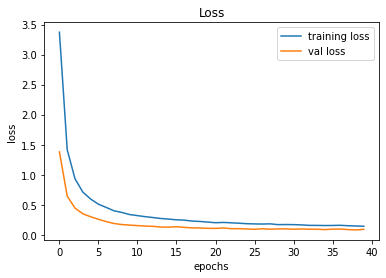

In [ ]:
plt.figure(0)
plt.plot(test_plot.history['accuracy'], label='training accuracy')
plt.plot(test_plot.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(test_plot.history['loss'], label='training loss')
plt.plot(test_plot.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


### Lenet Hyperparameter tunning

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

We already saw the basic model of the our base LeNet Neural network, we want to see how far we can push this model with hyper parameter tuning

In [ ]:
batches = [32,64,128]
dropout = [0.2, 0.25, 0.5, 0.1] 
filtersize_1 = [(5,5), (7,7), (9,9)]
filtersize_2 = [(3,3), (2,2), (1,1)]
search_space = dict(batch_size = batches, drop_1 = dropout, drop_2 = dropout, drop_3 = dropout, k_size1 = filtersize_1, k_size2 = filtersize_2)

These will be the hyperparameters that we are going to tune our LeNet Neural network. Batches is the batch size of the data: it is the amount data points in a single partion that is  going to be passed through our Neural Network, the higher the value the faster it runs. Dropout is the dropour rate of the data, it is primarly used to compensate for over fitting, we are going to have to use 3 dropout rates. Filter size is the size of our filter for the nerual net, in this case we have to run a smaller filter on the latter have of our NN. Epoch is how many times we are going to train our neural net, it is always tune in hyperparam tunning but 40 would be a solid number. 

In [ ]:
clf_keras = KerasClassifier(build_fn = LeNet, epochs = 40, verbose = 0)

We will wrap our tensorflow function into a Scikit learn wrapper in order to do our cross validation

In [ ]:
rand = RandomizedSearchCV(estimator=clf_keras, param_distributions=search_space, verbose= 3, cv = 5)

This cross validation will be a randomized search CV, since it will take alot of computation and time to perform a grid search on the every possible combination of hyperparameters that we have in our dictionary. The total amount of combinations of hyperparameters is 1728.

In [ ]:
rand.fit(X_train,y_train)
params = rand.best_params_

In [ ]:
params

{'k_size2': (2, 2),
 'k_size1': (5, 5),
 'drop_3': 0.25,
 'drop_2': 0.2,
 'drop_1': 0.1,
 'batch_size': 128}

As We can see this will be our hyperparameter tuned CNN network. Where there is still a 5x5 layer, but we have a samller filter compared to the orignal neural network.

# Discussion

### Interpreting the result

OK, you've given us quite a bit of tech informaiton above, now its time to tell us what to pay attention to in all that.  Think clearly about your results, decide on one main point and 2-4 secondary points you want us to understand. Highlight HOW your results support those points.  You probably want 2-5 sentences per point.

### Limitations

Are there any problems with the work?  For instance would more data change the nature of the problem? Would it be good to explore more hyperparams than you had time for?   

### Ethics & Privacy

If your project has obvious potential concerns with ethics or data privacy discuss that here.  Almost every ML project put into production can have ethical implications if you use your imagination. Use your imagination.

Even if you can't come up with an obvious ethical concern that should be addressed, you should know that a large number of ML projects that go into producation have unintended consequences and ethical problems once in production. How will your team address these issues?

Consider a tool to help you address the potential issues such as https://deon.drivendata.org

### Conclusion

Reiterate your main point and in just a few sentences tell us how your results support it. Mention how this work would fit in the background/context of other work in this field if you can. Suggest directions for future work if you want to.

# Footnotes
<a name="arcosnote"></a>1.[^](#arcosnote): Evaluation of deep neural networks for traffic sign detection systems. *Neurocomputing 2018*. https://paperswithcode.com/paper/evaluation-of-deep-neural-networks-for<br> 
<a name="kakarlanote"></a>2.[^](#kakarlanote): Traffic Sign Classification using Residual Networks(ResNet). *Syam Kakarla*. https://towardsdatascience.com/traffic-sign-classification-using-residual-networks-resnet-4b550046ff83<br>
<a name="pytorchnote"></a>3.[^](#pytorchnote): How Does PyTorch Support ResNet?. *run.ai*. https://www.run.ai/guides/deep-learning-for-computer-vision/pytorch-resnet#ResNet-Architecture<br>
<a name= "lenote"></a>4.[^](#lenote): Gradient-Base Learning applied to Document Recognition. *Yann LeCun et. al*. http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf